In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232321,ZWE,Africa,Zimbabwe,2022-10-30,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
232322,ZWE,Africa,Zimbabwe,2022-10-31,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
232323,ZWE,Africa,Zimbabwe,2022-11-01,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
232324,ZWE,Africa,Zimbabwe,2022-11-02,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(232326, 67)

In [ ]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
df.describe

<bound method NDFrame.describe of        iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
232321      ZWE    Africa     Zimbabwe  2022-10-30     257893.0        0.0   
232322      ZWE    Africa     Zimbabwe  2022-10-31     257893.0        0.0   
232323      ZWE    Africa     Zimbabwe  2022-11-01     257893.0        0.0   
232324      ZWE    Africa     Zimbabwe  2022-11-02     257893.0        0.0   
232325      ZWE    Africa     Zimbabwe  2022-11-03     257893.0        0.0   

        new_cases_smoothed  t

In [ ]:
df.drop(['new_deaths_smoothed','new_cases_per_million','total_cases_per_million','new_cases_smoothed'],axis=1,inplace=True)


In [ ]:
df.shape

(232326, 63)

In [ ]:
df.rename(columns={'date':'Date','location':'Country','continent':'Continent','iso_code':'ISO_code'},inplace=True)
df

,ISO_code,Continent,Country,Date,total_cases,new_cases,total_deaths,new_deaths,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232321,ZWE,Africa,Zimbabwe,2022-10-30,257893.0,0.0,5606.0,0.0,0.0,343.494,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
232322,ZWE,Africa,Zimbabwe,2022-10-31,257893.0,0.0,5606.0,0.0,0.0,343.494,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
232323,ZWE,Africa,Zimbabwe,2022-11-01,257893.0,0.0,5606.0,0.0,0.0,343.494,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
232324,ZWE,Africa,Zimbabwe,2022-11-02,257893.0,0.0,5606.0,0.0,0.0,343.494,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [ ]:
continent_unique=list(df.Continent.unique())
continent_unique

['Asia', nan, 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

In [ ]:
#simple Imputer
imputer=SimpleImputer(strategy='constant')
df2=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [ ]:
df3 = df2.groupby(['Date','Country',])[['Date','Country','total_cases','total_deaths','total_vaccinations']].sum().reset_index(drop=True)

In [ ]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,missing_value,missing_value,missing_value
1,2020-01-01,Mexico,missing_value,missing_value,missing_value
2,2020-01-02,Argentina,missing_value,missing_value,missing_value
3,2020-01-02,Mexico,missing_value,missing_value,missing_value
4,2020-01-03,Argentina,missing_value,missing_value,missing_value
...,...,...,...,...,...
232321,2022-11-03,Wallis and Futuna,3415.0,7.0,missing_value
232322,2022-11-03,World,631707818.0,6597533.0,missing_value
232323,2022-11-03,Yemen,11944.0,2158.0,missing_value
232324,2022-11-03,Zambia,333685.0,4017.0,missing_value


In [ ]:
df3['total_cases'].replace({'missing_value':0},inplace=True)

In [ ]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,0.0,missing_value,missing_value
1,2020-01-01,Mexico,0.0,missing_value,missing_value
2,2020-01-02,Argentina,0.0,missing_value,missing_value
3,2020-01-02,Mexico,0.0,missing_value,missing_value
4,2020-01-03,Argentina,0.0,missing_value,missing_value
...,...,...,...,...,...
232321,2022-11-03,Wallis and Futuna,3415.0,7.0,missing_value
232322,2022-11-03,World,631707818.0,6597533.0,missing_value
232323,2022-11-03,Yemen,11944.0,2158.0,missing_value
232324,2022-11-03,Zambia,333685.0,4017.0,missing_value


In [ ]:
df3['total_deaths'].replace({'missing_value':0},inplace=True)
df3['total_vaccinations'].replace({'missing_value':0},inplace=True)

In [ ]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,0.0,0.0,0.0
1,2020-01-01,Mexico,0.0,0.0,0.0
2,2020-01-02,Argentina,0.0,0.0,0.0
3,2020-01-02,Mexico,0.0,0.0,0.0
4,2020-01-03,Argentina,0.0,0.0,0.0
...,...,...,...,...,...
232321,2022-11-03,Wallis and Futuna,3415.0,7.0,0.0
232322,2022-11-03,World,631707818.0,6597533.0,0.0
232323,2022-11-03,Yemen,11944.0,2158.0,0.0
232324,2022-11-03,Zambia,333685.0,4017.0,0.0


In [ ]:
df4=df3[df3['total_deaths']>1000000]
countries=df4['Country'].unique()
len(countries)

10

In [ ]:
country_deaths_graterthan1000000 = list(df4.Country.unique())
country_deaths_graterthan1000000

['World',
 'High income',
 'Upper middle income',
 'Europe',
 'South America',
 'Asia',
 'Lower middle income',
 'North America',
 'European Union',
 'United States']

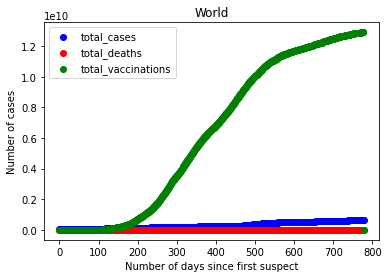

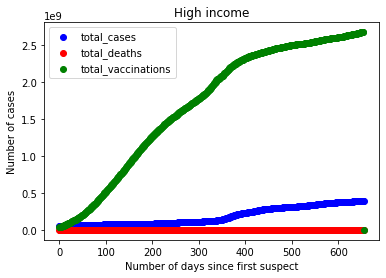

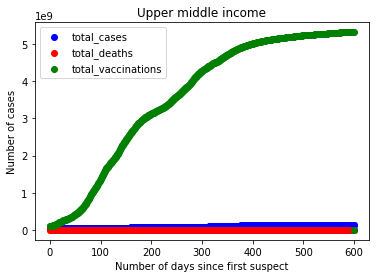

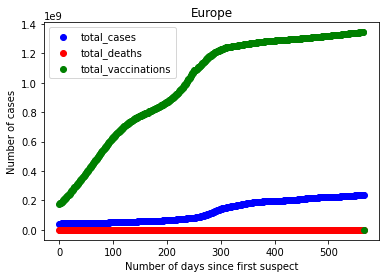

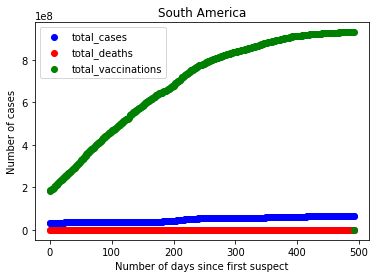

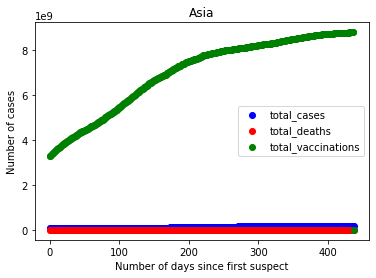

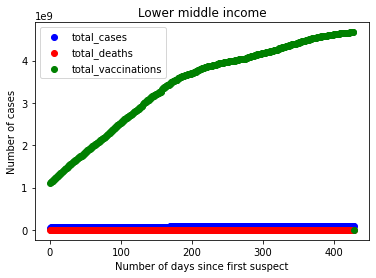

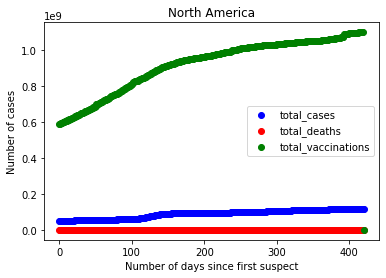

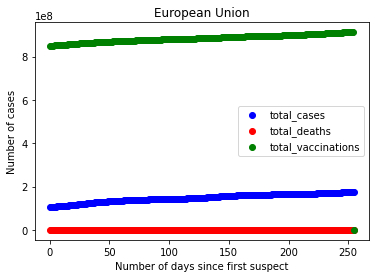

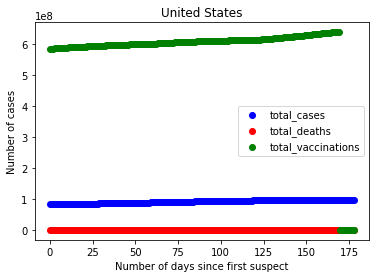

In [ ]:
for idx in range(0,len(countries)):
  c = df4[df4['Country']==countries[idx]].reset_index(drop=True)
  plt.scatter(np.arange(0,len(c)),c['total_cases'],color='blue',label='total_cases')
  plt.scatter(np.arange(0,len(c)),c['total_deaths'],color='red',label='total_deaths')
  plt.scatter(np.arange(0,len(c)),c['total_vaccinations'],color='green',label='total_vaccinations')
  plt.title(countries[idx])
  plt.xlabel("Number of days since first suspect")
  plt.ylabel("Number of cases")
  plt.legend()
  plt.show()

In [ ]:
df5=df4.groupby(['Country'])[['Country','total_cases','total_deaths']].sum().reset_index(drop=True)

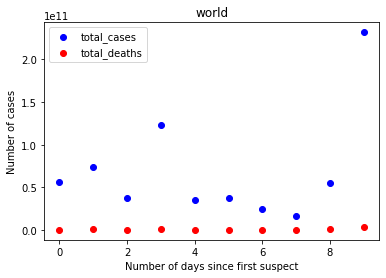

In [ ]:
c = df5
plt.scatter(np.arange(0,len(c)),c['total_cases'],color='blue',label='total_cases')
plt.scatter(np.arange(0,len(c)),c['total_deaths'],color='red',label='total_deaths')
plt.title('world')
plt.xlabel('Number of days since first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()

In [ ]:
date = df4['Date'].unique()
len(date)

779

In [ ]:
df6 = df4.groupby(['Date'])[['Date','total_cases','total_deaths']].sum().reset_index(drop=True)

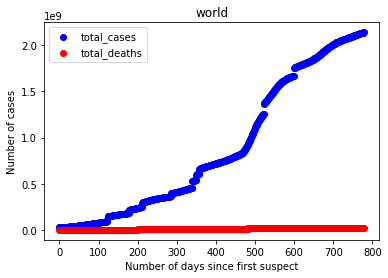

In [ ]:
c= df6
plt.scatter(np.arange(0,len(c)),c['total_cases'],color='blue',label='total_cases')
plt.scatter(np.arange(0,len(c)),c['total_deaths'],color='red',label='total_deaths')
plt.title('world')
plt.xlabel('Number of days since first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()